In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PART-A data preperation

In [35]:
df1=pd.read_csv("fear_greed_index.csv")
df2=pd.read_csv("historical_data.csv")

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [37]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [55]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

### checking for null values

In [39]:
df1.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [40]:
df2.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

### checking for duplicates

In [41]:
df1.duplicated().sum()

0

In [42]:
df2.duplicated().sum()

0

### combining both datasets

In [56]:
df2[['Timestamp','Timestamp IST']].head()

,Timestamp,Timestamp IST
0,1.730000e+12,02-12-2024 22:50
1,1.730000e+12,02-12-2024 22:50
2,1.730000e+12,02-12-2024 22:50
3,1.730000e+12,02-12-2024 22:50
4,1.730000e+12,02-12-2024 22:50


In [57]:
df1[['timestamp']].head()

,timestamp
0,1517463000
1,1517549400
2,1517635800
3,1517722200
4,1517808600


In [58]:
# Convert df1 (seconds)
df1['timestamp'] = pd.to_datetime(df1['timestamp'], unit='s')

# Convert df2 (milliseconds)
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], unit='ms')

In [59]:
#aligning by date
df1['date'] = df1['timestamp'].dt.floor('D')
df2['date'] = df2['Timestamp'].dt.floor('D')

In [62]:
#merging both datasets
merged_df = pd.merge(df1, df2, on='date', how='inner')

In [61]:
merged_df.head()

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,2023-03-28 05:30:00,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
1,2023-03-28 05:30:00,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
2,2023-03-28 05:30:00,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
3,2023-11-14 05:30:00,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20
4,2023-11-14 05:30:00,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20


In [64]:
merged_df.shape

(184263, 20)

In [67]:
merged_df.duplicated().any()

False

In [185]:
merged_df.columns

Index(['timestamp', 'value', 'classification', 'date', 'Account', 'Coin',
       'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'position_type'],
      dtype='object')

In [76]:
merged_df['Closed PnL'].dtype

dtype('int64')

In [75]:
merged_df['Closed PnL']=merged_df['Closed PnL'].astype(int)

In [77]:
#daily pnl per account
daily_pnl = (
    merged_df
    .groupby(['date', 'Account'])['Closed PnL']
    .sum()
    .reset_index()
)

In [79]:
daily_pnl

,date,Account,Closed PnL
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,118
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5562
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0
...,...,...,...
72,2025-02-19,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,552461
73,2025-02-19,0xb899e522b5715391ae1d4f137653e7906c5e2115,21736
74,2025-02-19,0xbaaaf6571ab7d571043ff1e313a9609a10637864,935743
75,2025-02-19,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,325138


In [80]:
#overall win rate
win_rate=(
    (merged_df['Closed PnL']>0).sum()
    /merged_df['Closed PnL'].count()
)*100

win_rate

35.428707879498326

In [82]:
#win rate per account
win_rate_per_account = (
    merged_df
    .assign(win = merged_df['Closed PnL'] > 0)
    .groupby('Account')['win']
    .mean() * 100
).reset_index(name='win_rate_%')
win_rate_per_account

,Account,win_rate_%
0,0x083384f897ee0f19899168e3b1bec365f52a9012,35.673127
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,37.555152
2,0x271b280974205ca63b716753467d5a371de622ab,29.668412
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,35.685210
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,47.619048
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,28.200972
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,24.993034
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,43.674699
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,22.193211
9,0x430f09841d65beb3f27765503d0f850b8bce7713,56.898192


In [84]:
#average trade size
avg_trade_size = merged_df['Size USD'].mean()
avg_trade_size

4780.732808160075

In [86]:
#no of trades per day
trades_per_day = (
    merged_df
    .groupby('date')['Trade ID']
    .count()
    .reset_index(name='number_of_trades')
)

trades_per_day

,date,number_of_trades
0,2023-03-28,3
1,2023-11-14,1045
2,2024-03-09,6962
3,2024-07-03,7141
4,2024-10-27,35241
5,2025-02-19,133871


In [87]:
#long/short ration
merged_df['Direction'].value_counts()

Direction
Open Long               45564
Close Long              44935
Open Short              32861
Close Short             28091
Sell                    17890
Buy                     14657
Spot Dust Conversion      137
Short > Long               65
Long > Short               54
Auto-Deleveraging           8
Settlement                  1
Name: count, dtype: int64

In [88]:
merged_df['position_type'] = np.where(
    merged_df['Direction'].str.contains('Long'),
    'Long',
    np.where(
        merged_df['Direction'].str.contains('Short'),
        'Short',
        np.nan
    )
)

In [89]:
long_count = (merged_df['position_type'] == 'Long').sum()
short_count = (merged_df['position_type'] == 'Short').sum()

long_short_ratio = long_count / short_count
long_short_ratio

1.4867108544428402

### PART-B Analysis

In [ ]:
#Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?
#to do this we will have daily_pnl,daily win,drawdown proxy
#let's create them

In [109]:
daily_pnll = (
    merged_df
    .groupby(['date', 'classification'])['Closed PnL']
    .sum()
    .reset_index()
)
daily_pnll

,date,classification,Closed PnL
0,2023-03-28,Greed,0
1,2023-11-14,Greed,118
2,2024-03-09,Extreme Greed,175751
3,2024-07-03,Neutral,157915
4,2024-10-27,Greed,3182977
5,2025-02-19,Fear,6678129


In [90]:
daily_win = (
    merged_df
    .assign(win = merged_df['Closed PnL'] > 0)
    .groupby(['date', 'classification'])['win']
    .mean()
    .reset_index()
)

daily_win['win'] *= 100

In [94]:
daily_drawdown = (
    merged_df
    .groupby(['date', 'classification'])['Closed PnL']
    .min()
    .reset_index(name='worst_trade')
)

In [107]:
#compare average daily pnl
daily_pnll.groupby('classification')['Closed PnL'].mean()

classification
Extreme Greed    1.757510e+05
Fear             6.678129e+06
Greed            1.061032e+06
Neutral          1.579150e+05
Name: Closed PnL, dtype: float64

In [96]:
#compare daily win
daily_win.groupby('classification')['win'].mean()

classification
Extreme Greed    42.099971
Fear             34.782739
Greed            19.937839
Neutral          27.167063
Name: win, dtype: float64

In [97]:
#compare draw down
daily_drawdown.groupby('classification')['worst_trade'].mean()

classification
Extreme Greed   -21524.000000
Fear            -35681.000000
Greed           -39891.666667
Neutral         -18360.000000
Name: worst_trade, dtype: float64

In [139]:
fear_trades = merged_df.loc[
    merged_df['classification'] == 'Fear',
    'Closed PnL'
]

In [136]:
 greed_trades = merged_df.loc[
    merged_df['classification'].str.contains('Greed'),
    'Closed PnL'
]

In [133]:

greed_trades.shape

(43251, 21)

In [127]:
fear_trades.shape

(133871, 21)

In [140]:
from scipy.stats import ttest_ind
ttest_ind(fear_trades, greed_trades)

TtestResult(statistic=-5.297458182210952, pvalue=1.175655570653843e-07, df=177120.0)

In [ ]:
'''Based on the independent t-test:
There is a statistically significant difference in PnL between Fear and Greed days (p < 0.001).
The negative t-statistic indicates that average PnL during Greed days is significantly higher than during Fear days.
This suggests that market sentiment (Fear vs Greed) has a measurable impact on trading performance.'''

In [ ]:
#Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?

In [159]:
fear_df = merged_df[merged_df['classification'] == 'Fear']
greed_df = merged_df[merged_df['classification'].str.contains('Greed')]

In [165]:
fear_freq = len(fear_df)
greed_freq = len(greed_df)

In [166]:
fear_freq,greed_freq

(133871, 43251)

In [168]:
fear_days = fear_df['date'].nunique()
greed_days = greed_df['date'].nunique()
fear_avg_trades_per_day = fear_freq / fear_days
greed_avg_trades_per_day = greed_freq/ greed_days
fear_avg_trades_per_day,greed_avg_trades_per_day

(133871.0, 10812.75)

In [156]:
#Trade Frequency Significantly higher during Fear periods (12x increase).

1

In [170]:
merged_df['Side'].value_counts()

Side
SELL    95885
BUY     88378
Name: count, dtype: int64

In [172]:
fear_buy_ratio = (fear_df['Side'] == 'BUY').mean()
greed_buy_ratio = (greed_df['Side'] == 'BUY').mean()
fear_buy_ratio, greed_buy_ratio

(0.49361698948988203, 0.434487063882916)

In [ ]:
#there is not much significant change but trades more likely to buy on fear rather than greed

In [173]:
#based on position
fear_mean_size = fear_df['Size USD'].mean()
greed_mean_size = greed_df['Size USD'].mean()
fear_mean_size, greed_mean_size
#Traders trade larger during stress

(5259.977836723412, 3581.661513028601)

In [174]:
from scipy.stats import ttest_ind

ttest_ind(
    fear_df['Size USD'],
    greed_df['Size USD'],
    equal_var=False
)

TtestResult(statistic=16.668573026880495, pvalue=2.4799486303414755e-62, df=174129.16486199189)

In [ ]:
'''Traders increase position sizes during Fear periods, possibly due to volatility-driven opportunities or reactive trading behavior.'''

In [176]:
trader_summary = merged_df.groupby('Account').agg({
    'Trade ID': 'count',           # trade frequency
    'Size USD': 'mean',            # avg position size
    'Closed PnL': ['sum', 'mean'], # profitability
    'date': 'nunique'              # active days
})
trader_summary.columns = [
    'total_trades',
    'avg_position_size',
    'total_pnl',
    'avg_pnl',
    'active_days'
]
trader_summary = trader_summary.reset_index()

In [177]:
#frequent vs infrequent traders
median_trades = trader_summary['total_trades'].median()
trader_summary['frequency_segment'] = trader_summary['total_trades'].apply(
    lambda x: 'Frequent' if x > median_trades else 'Infrequent'
)

In [178]:
trader_summary.groupby('frequency_segment')['total_pnl'].mean()

frequency_segment
Frequent      484380.875
Infrequent    152799.750
Name: total_pnl, dtype: float64

In [184]:
#consistent winners vs inconsistent traders
win_rate = merged_df.groupby('Account')['Closed PnL'].apply(
    lambda x: (x > 0).mean()
).reset_index(name='win_rate')
trader_summary = trader_summary.merge(win_rate, on='Account')
trader_summary

,Account,total_trades,avg_position_size,total_pnl,avg_pnl,active_days,frequency_segment,win_rate_x,performance_segment,pnl_volatility_x,pnl_volatility_y,win_rate_y
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,16159.576734,1599709,418.991357,2,Frequent,0.356731,Inconsistent,4692.403493,4692.403493,0.356731
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3853,1759.743439,37063,9.619258,2,Frequent,0.375552,Inconsistent,180.879426,180.879426,0.375552
2,0x271b280974205ca63b716753467d5a371de622ab,1146,10908.183944,31587,27.562827,3,Infrequent,0.296684,Inconsistent,119.570527,119.570527,0.296684
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13266,509.016502,129951,9.795794,2,Frequent,0.356852,Inconsistent,113.404120,113.404120,0.356852
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3234,3142.909573,167964,51.936920,2,Frequent,0.476190,Inconsistent,255.943455,255.943455,0.476190
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,617,1894.041896,-27712,-44.914100,6,Infrequent,0.282010,Inconsistent,636.649278,636.649278,0.282010
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,3589,4790.575486,14187,3.952912,2,Frequent,0.249930,Inconsistent,730.408046,730.408046,0.249930
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,332,3445.471265,53419,160.900602,2,Infrequent,0.436747,Inconsistent,1279.808820,1279.808820,0.436747
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,383,5189.367128,199461,520.785901,2,Infrequent,0.221932,Inconsistent,2228.233247,2228.233247,0.221932
9,0x430f09841d65beb3f27765503d0f850b8bce7713,1051,2580.497012,416266,396.066603,4,Infrequent,0.568982,Inconsistent,1782.956397,1782.956397,0.568982


In [181]:
trader_summary['performance_segment'] = trader_summary['win_rate'].apply(
    lambda x: 'Consistent Winner' if x > 0.6 else 'Inconsistent'
)

In [183]:
pnl_std = merged_df.groupby('Account')['Closed PnL'].std().reset_index(name='pnl_volatility')
trader_summary = trader_summary.merge(pnl_std, on='Account')

In [ ]:
'''Trader segmentation reveals three distinct behavioral groups. Frequent traders exhibit higher turnover and moderate profitability, 
while infrequent traders show more stable but lower engagement. High exposure traders demonstrate greater risk-taking behavior,
often resulting in higher return variability. Consistent winners maintain higher win rates and lower PnL volatility, indicating 
disciplined trading strategies.'''

In [186]:
trader_summary = merged_df.groupby('Account').agg({
    'Trade ID': 'count',
    'Size USD': 'mean',
    'Closed PnL': ['sum', 'mean'],
    'date': 'nunique'
})
trader_summary.columns = [
    'total_trades',
    'avg_position_size',
    'total_pnl',
    'avg_pnl',
    'active_days'
]
trader_summary = trader_summary.reset_index()

In [187]:
trader_summary

,Account,total_trades,avg_position_size,total_pnl,avg_pnl,active_days
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,16159.576734,1599709,418.991357,2
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3853,1759.743439,37063,9.619258,2
2,0x271b280974205ca63b716753467d5a371de622ab,1146,10908.183944,31587,27.562827,3
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13266,509.016502,129951,9.795794,2
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3234,3142.909573,167964,51.936920,2
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,617,1894.041896,-27712,-44.914100,6
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,3589,4790.575486,14187,3.952912,2
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,332,3445.471265,53419,160.900602,2
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,383,5189.367128,199461,520.785901,2
9,0x430f09841d65beb3f27765503d0f850b8bce7713,1051,2580.497012,416266,396.066603,4


In [189]:
#frequent vs infrequent tables
median_trades = trader_summary['total_trades'].median()
trader_summary['frequency_segment'] = trader_summary['total_trades'].apply(
    lambda x: 'Frequent' if x > median_trades else 'Infrequent'
)
freq_table = trader_summary.groupby('frequency_segment').agg({
    'total_pnl': 'mean',
    'avg_position_size': 'mean',
    'active_days': 'mean'
})
freq_table

,total_pnl,avg_position_size,active_days
frequency_segment,,,
Frequent,484380.875,7289.674242,2.3750
Infrequent,152799.750,4573.872365,2.4375


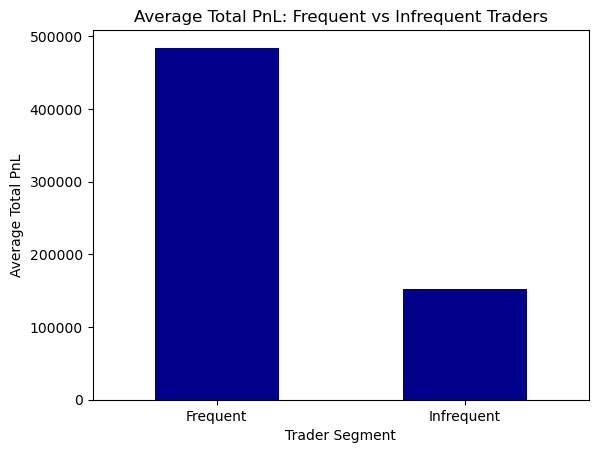

In [194]:
freq_pnl = trader_summary.groupby('frequency_segment')['total_pnl'].mean()
plt.figure()
freq_pnl.plot(kind='bar',color='darkblue')
plt.title("Average Total PnL: Frequent vs Infrequent Traders")
plt.xlabel("Trader Segment")
plt.ylabel("Average Total PnL")
plt.xticks(rotation=0)
plt.show()

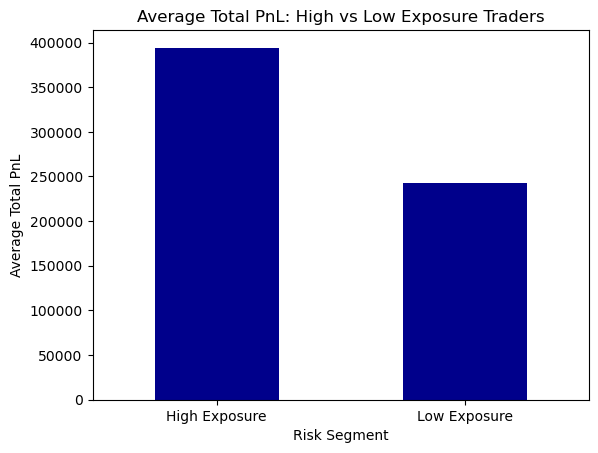

In [196]:
median_size = trader_summary['avg_position_size'].median()
trader_summary['risk_segment'] = trader_summary['avg_position_size'].apply(
    lambda x: 'High Exposure' if x > median_size else 'Low Exposure'
)
risk_pnl = trader_summary.groupby('risk_segment')['total_pnl'].mean()
plt.figure()
risk_pnl.plot(kind='bar',color='darkblue')
plt.title("Average Total PnL: High vs Low Exposure Traders")
plt.xlabel("Risk Segment")
plt.ylabel("Average Total PnL")
plt.xticks(rotation=0)
plt.show()

## stratagies

In [ ]:
'''1)High Exposure + Inconsistent traders should reduce position size during high volatility periods.
If Trader is High Exposure and Win rate < 60% Then Reduce position size by 30–50% and Limited number of trades per day'''

In [ ]:
'''2)If Win rate > 60% and Exposure around median Then Allow higher daily trade limit,Offer lower fee incentives Enable
slightly higher leverage'''